# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [ ]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs.

In [2]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

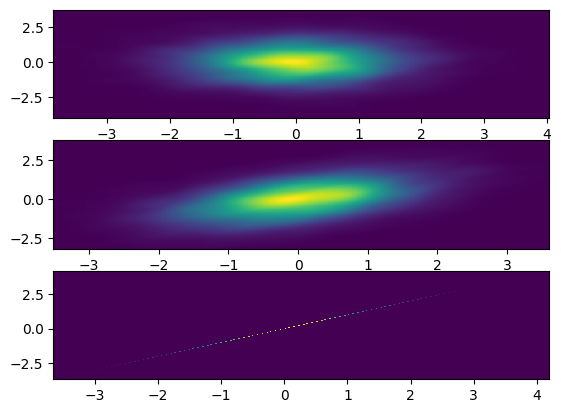

In [ ]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)

# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [3]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to;
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)

In [25]:
def generate_data(n, p):
  data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)
  X, Y = data_2d[:,0], data_2d[:,1]
  return X, Y

def digitize(X, Y, n_bins):
  X_dig = np.digitize(X,np.linspace(X.min(),X.max(),num=n_bins+1))
  Y_dig = np.digitize(Y,np.linspace(Y.min(),Y.max(),num=n_bins+1))
  return X_dig, Y_dig

def get_pearsonr(X, Y):
  return pearsonr(X,Y).statistic

def get_mi(X_dig, Y_dig):
  return mutual_info_score(X_dig, Y_dig)

def get_metrics(X, Y, n_bins=10):
  corr = get_pearsonr(X, Y)
  X_dig, Y_dig = digitize(X, Y, n_bins)
  mi = get_mi(X_dig, Y_dig)
  return corr, mi

#### bp 3)

In [5]:
def compute_metrics(n, p, N, n_bins=10):
  pearsons = []
  mutuals = []
  X, Y = generate_data(n, p)
  X_dig, Y_dig = digitize(X, Y, n_bins)
  for i in range(N):
    pearsons.append(pearsonr(X, Y)[0])
    mutuals.append(mutual_info_score(X_dig, Y_dig))
  avg_pearson = sum(pearsons) / len(pearsons)
  avg_mutuals = sum(mutuals) / len(mutuals)
  return avg_pearson, avg_mutuals


In [14]:
corr_vals = []
mi_vals = []
ps = np.linspace(0,1,100)
for p in ps:
  c, m = compute_metrics(1000, p, 100)
  corr_vals.append(c)
  mi_vals.append(m)

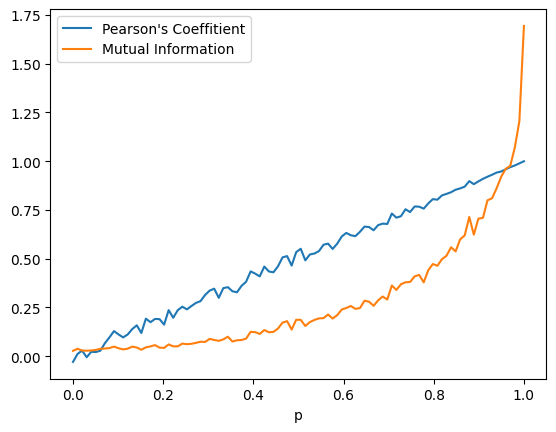

In [15]:
plt.plot(ps,corr_vals)
plt.plot(ps,mi_vals)
plt.legend(["Pearson's Coeffitient","Mutual Information"])
plt.xlabel('p')
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$


 and

$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$

equals


$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [ ]:
I = (-0.5) * np.log(1 - np.array(np.linspace(0,1,100))**2)
I_hat = (-0.5) * np.log(1 - np.array(corr_vals)**2)

<ipython-input-93-e8dde7f42d5f>:1: RuntimeWarning: divide by zero encountered in log
  I = (-0.5) * np.log(1 - np.array(np.linspace(0,1,100))**2)


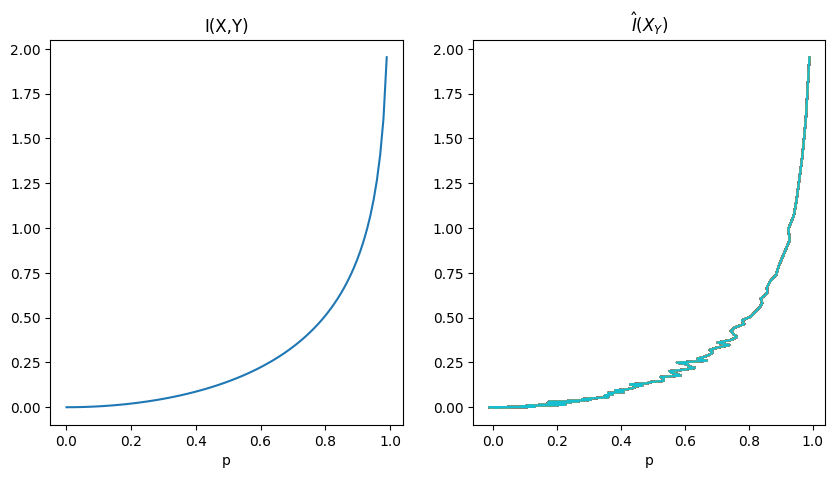

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(np.linspace(0,1,100),I)
axs[0].set_title("I(X,Y)")
axs[0].set_xlabel("p")
axs[1].plot(corr_vals,I)
axs[1].set_title(r"$\hat I(X_Y)$")
axs[1].set_xlabel("p")
#plt.plot(I_hat)
plt.show()

### b)

#### bp 1)

In [ ]:
# again: this is too time consuming so here is an answer

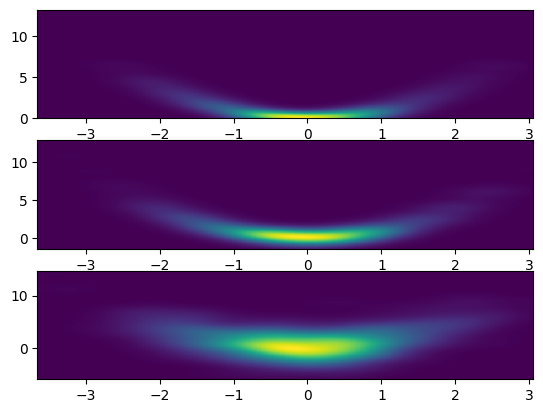

In [ ]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)

# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

In [ ]:
def random_mv_2(sigma, n=1000):
    data = np.array([x, x**2 + np.random.normal(0, sigma, n)]).T
    return data[:,0], data[:,1]

In [17]:
def generate_data2(n, sigma):
  x = np.random.normal(0, 1, n)
  data_2d = np.array([x, x**2 + np.random.normal(0, sigma, n)]).T
  X, Y = data_2d[:,0], data_2d[:,1]
  return X, Y

def compute_metrics2(n, eps, N, n_bins=10):
  pearsons = []
  mutuals = []
  X, Y = generate_data2(n, eps)
  X_dig, Y_dig = digitize(X, Y, n_bins)
  for i in range(N):
    pearsons.append(pearsonr(X, Y)[0])
    mutuals.append(mutual_info_score(X_dig, Y_dig))
  avg_pearson = sum(pearsons) / len(pearsons)
  avg_mutuals = sum(mutuals) / len(mutuals)
  return avg_pearson, avg_mutuals


#### bp 2) and 3)

In [18]:
from tqdm import tqdm

In [26]:
sigmas = np.linspace(0,2,25)
pearson_coeffs2 = []
mi_scores2 = []
for sigma in tqdm(sigmas):
  p, m = compute_metrics2(1000, sigma, 100)
  pearson_coeffs2.append(p)
  mi_scores2.append(m)

100%|██████████| 25/25 [00:09<00:00,  2.51it/s]


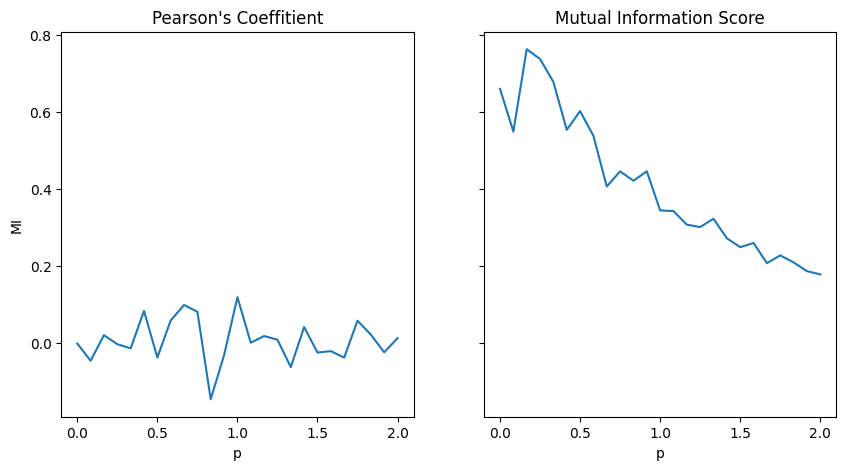

In [27]:
fig, axs = plt.subplots(1,2,figsize=(10,5),sharey=True)
axs[0].plot(sigmas,pearson_coeffs2)
axs[0].set_title("Pearson's Coeffitient")
axs[0].set_ylabel('Correlation')
axs[0].set_xlabel('p')
axs[1].plot(sigmas,mi_scores2)
axs[1].set_title("Mutual Information Score")
axs[1].set_xlabel('p')
axs[0].set_ylabel('MI')
plt.show()

## Task 2

### a)

In [ ]:
def asymptotic_independence_test(x, y, stats = "mi", bins=10):
    stat_value = None

    if stats == "mi":
        x_discrete = np.digitize(x,
                                 bins=np.linspace(x.min(), x.max(), num=bins+1)
                                 )
        y_discrete = np.digitize(y,
                                 bins=np.linspace(y.min(), y.max(), num=bins+1)
                                 )

        mi = mutual_info_classif(np.array([x_discrete]).T, y_discrete)[0]
        stat_value = 2 * n * mi

    elif stats == "chi2":
        contingency = np.histogram2d(x, y, bins=bins)[0]
        stat_value = chi2_contingency(contingency)[0]

    p_value = chi2.sf(stat_value, (bins - 1) ** 2)
    return stat_value, p_value

In [28]:
def asymptotic_independence_test(X, Y, stats, n_bins=10):
  if stats == 'mi':
    X_dig = np.digitize(X, bins=np.linspace(X.min(), X.max(), num=n_bins+1))
    Y_dig = np.digitize(Y, bins=np.linspace(Y.min(), Y.max(), num=n_bins+1))
    mi = mutual_info_score(X_dig, Y_dig)
    stats = 2 * X.shape[0] * mi

  elif stats == 'chi2':
    cont_table = np.histogram2d(X, Y, bins=n_bins)[0]
    stats = chi2_contingency(cont_table)[0]


  p_value = chi2.sf(stats, (n_bins - 1) ** 2)
  return stats, p_value

### b)

In [29]:
def permutation_independence_test(X, Y, N=100, n_bins=10):
    X_dig = np.digitize(X, bins=np.linspace(X.min(), X.max(), num=n_bins+1))
    Y_dig = np.digitize(Y, bins=np.linspace(Y.min(), Y.max(), num=n_bins+1))

    mi = mutual_info_score(X_dig, Y_dig)

    mi_values = []
    for i in range(N):
        X_n = np.random.permutation(X)
        X_n_dig = np.digitize(X_n,bins=np.linspace(X_n.min(), X_n.max(), num=n_bins+1))

        mi_values.append(mutual_info_score(X_n_dig, Y_dig))

    mi_values = np.array(mi_values)
    p_value = (1 + np.sum(mi <= mi_values)) / (1 + N)
    return 2 * X.shape[0] * mi, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [ ]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

In [34]:
X, Y = generate_data(n=1000, p=0.0)

In [39]:
print("Asymptotic independence test (MI)")
res = asymptotic_independence_test(X, Y, stats="mi")
print(res)

Asymptotic independence test (MI)
(82.77336983676734, 0.42440402966320406)


In [40]:
if res[1] < 0.05:
  print("Reject")
else:
  print("Don't Reject")

Don't Reject


In [41]:
print("Asymptotic independence test (chi2)")
res = asymptotic_independence_test(X, Y, stats="chi2")
print(res)

Asymptotic independence test (chi2)
(73.67233627103701, 0.7058289281514597)


In [42]:
if res[1] < 0.05:
  print("Reject")
else:
  print("Don't Reject")

Don't Reject


In [43]:
print("Permutation independence test")
res = permutation_independence_test(X, Y)
print(res)

Permutation independence test
(82.77336983676734, 0.5643564356435643)


In [44]:
if res[1] < 0.05:
  print("Reject")
else:
  print("Don't Reject")

Don't Reject


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [ ]:
# independent r.v. - ideally we will reject the null hypothesis

In [46]:
X, Y = generate_data(n=1000, p=0.75)

In [47]:
print("Asymptotic independence test (MI)")
res = asymptotic_independence_test(X, Y, stats="mi")
print(res)

Asymptotic independence test (MI)
(902.5441302585654, 6.248475537169529e-139)


In [48]:
if res[1] < 0.05:
  print("Reject")
else:
  print("Don't Reject")

Reject


In [49]:
print("Asymptotic independence test (chi2)")
res = asymptotic_independence_test(X, Y, stats="chi2")
print(res)

Asymptotic independence test (chi2)
(1406.2667479791935, 1.0159164459418518e-240)


In [50]:
if res[1] < 0.05:
  print("Reject")
else:
  print("Don't Reject")

Reject


In [51]:
print("Permutation independence test")
res = permutation_independence_test(X, Y)
print(res)

Permutation independence test
(902.5441302585654, 0.009900990099009901)


In [52]:
if res[1] < 0.05:
  print("Reject")
else:
  print("Don't Reject")

Reject
